<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/GrowthAccounting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
#year 年
#countrycode　国名
#rgdpna　実質GDP
#rnna　実質資本ストック
#pop　総人口
#emp　雇用者数
#avh 平均労働時間
#labsh 消費割合
#rtfpna TFP
def calculate_growth_accounting(df, country):
    # Filter and select relevant columns for the specified country
    data = df.loc[df['country'] == country][['year', 'countrycode', 'rgdpna', 'rnna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
    data = data.loc[(data['year'] >= 1975) & (data['year'] <= 2020)].dropna()
    
    if data.empty:
        return None
    
    # Calculate additional variables
    data['alpha'] = 1 - data['labsh']
    data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
    data['hours'] = data['emp'] * data['avh']  # L
    data['y_l'] = data['rgdpna'] / data['hours']  # Y/L
    data['k'] = data['rnna'] / data['hours']  # K/L

    # Extract necessary data
    firstA = data['rtfpna'].iloc[0]
    lastA = data['rtfpna'].iloc[-1]
    firstY = data['y_l'].iloc[0]
    lastY = data['y_l'].iloc[-1]
    firstK = data['k'].iloc[0]
    lastK = data['k'].iloc[-1]

    # Calculate growth rates and shares
    gg = lastY / firstY
    ga = lastA / firstA
    gk = (lastK / firstK) * data['alpha'].mean()

    a = ga
    k = gk
    s_a = a / (a + k)
    s_k = k / (a + k)

    return {
        'country': country,
        'gg': gg,
        'ga': ga,
        'gk': gk,
        's_a': s_a,
        's_k': s_k
    }

# List of countries
countries = ['Benin', 'Hungary', 'Russian Federation', 'Yemen', 'Burundi', 'Rwanda', 'China, Hong Kong SAR', 
             'Sao Tome and Principe', 'Sint Maarten (Dutch part)', 'Central African Republic', 'Cameroon', 
             'Cabo Verde', 'Trinidad and Tobago', 'Venezuela (Bolivarian Republic of)', 'North Macedonia', 
             'France', 'Nepal', 'Brunei Darussalam', 'Honduras', 'Bangladesh', 'Guinea-Bissau', 
             'St. Vincent and the Grenadines', 'Lebanon', 'Ghana', 'Bolivia (Plurinational State of)', 
             'Barbados', 'United Kingdom', 'Republic of Moldova', 'Peru', 'Mauritius', 'Seychelles', 
             'Aruba', 'Japan', 'Ukraine', 'Jamaica', 'Nigeria', 'Netherlands', 'Albania', 'Togo', 'Denmark', 
             'Curaçao', 'Armenia', 'Equatorial Guinea', 'New Zealand', 'Montserrat', 'Guyana', 'Anguilla', 
             'Gambia', 'Jordan', 'Lithuania', 'Austria', 'Bahamas', 'Senegal', 'Mongolia', 'Uruguay', 
             'Taiwan', 'China', 'Sudan', 'Dominican Republic', 'Georgia', 'Belgium', 'Switzerland', 'Iraq', 
             'Mauritania', "Côte d'Ivoire", 'Poland', 'Estonia', 'Oman', 'United States', 'Uganda', 
             'Burkina Faso', 'Mexico', 'Sierra Leone', 'Germany', 'Kenya', 'Saudi Arabia', 'Uzbekistan', 
             'Saint Kitts and Nevis', 'Romania', 'Azerbaijan', 'Liberia', 'Belarus', 'Fiji', 
             'Iran (Islamic Republic of)', 'Iceland', 'Tajikistan', 'Morocco', 'Djibouti', 'Croatia', 
             'United Arab Emirates', 'Niger', 'Singapore', 'Botswana', 'Czech Republic', 'Latvia', 
             'China, Macao SAR', 'Madagascar', 'Malaysia', 'Maldives', 'Kazakhstan', 'Suriname', 'Luxembourg', 
             'Algeria', 'Cyprus', 'Ethiopia', 'Turkey', 'Ireland', 'Israel', 'Qatar', 'Guatemala', 'Ecuador', 
             'Chad', 'Tunisia', 'Lesotho', 'Bermuda', 'Republic of Korea', 'South Africa', 'Indonesia', 
             'Egypt', 'Kyrgyzstan', 'D.R. of the Congo', 'Bosnia and Herzegovina', 'Spain', 'Panama', 
             'Montenegro', 'Serbia', 'Slovakia', 'Slovenia', 'Costa Rica', 'Myanmar', 'Mozambique', 
             'Sri Lanka', 'Turkmenistan', 'U.R. of Tanzania: Mainland', 'Paraguay', 'Philippines', 
             'Nicaragua', 'State of Palestine', 'Grenada', 'Guinea', 'Italy', 'El Salvador', 'Malta', 'Mali', 
             'Malawi', 'Zimbabwe', 'Namibia', 'Portugal', 'Finland', 'Saint Lucia', 'Viet Nam', 
             'Antigua and Barbuda', 'Cayman Islands', 'British Virgin Islands', 'Bahrain', 'Gabon', 
             "Lao People's DR", 'Dominica', 'Colombia', 'India', 'Turks and Caicos Islands', 'Norway', 'Haiti', 
             'Chile', 'Bhutan', 'Zambia', 'Cambodia', 'Argentina', 'Sweden', 'Brazil', 'Kuwait', 'Canada', 
             'Eswatini', 'Greece', 'Bulgaria', 'Congo', 'Comoros', 'Syrian Arab Republic', 'Angola', 'Pakistan', 
             'Thailand', 'Australia', 'Belize']

# Load data from CSV file
df = df = pd.read_csv("pwt100.csv")

# List to store results
results = []

# Iterate over each country and calculate growth accounting
for country in countries:
    result = calculate_growth_accounting(df, country)
    if result:
        results.append(result)

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
results_df

,country,gg,ga,gk,s_a,s_k
0,Hungary,2.624236,1.403897,1.252123,0.528572,0.471428
1,Russian Federation,1.772568,1.684427,0.409420,0.804465,0.195535
2,"China, Hong Kong SAR",4.922529,1.647782,1.822121,0.474878,0.525122
3,Trinidad and Tobago,1.250522,1.337741,0.401089,0.769334,0.230666
4,Venezuela (Bolivarian Republic of),0.680275,0.617632,0.467890,0.568973,0.431027
...,...,...,...,...,...,...
59,Canada,1.665056,1.065893,0.670753,0.613765,0.386235
60,Greece,1.420292,0.797747,0.954170,0.455357,0.544643
61,Bulgaria,1.699872,0.857003,1.614694,0.346726,0.653274
62,Thailand,5.504988,1.900812,1.430464,0.570596,0.429404


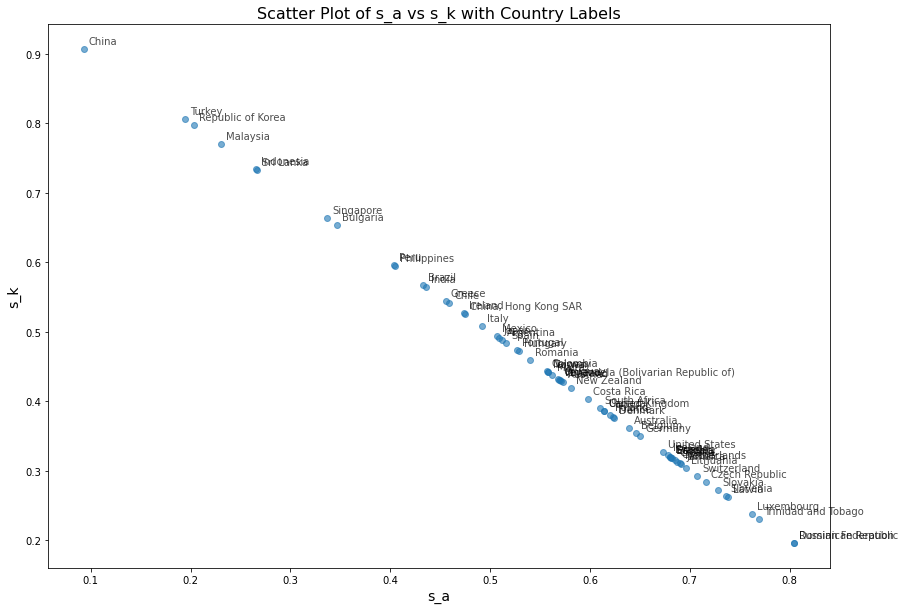

In [110]:
# 散布図を作成
plt.figure(figsize=(14, 10))
scatter = plt.scatter(results_df['s_a'], results_df['s_k'], alpha=0.6)

# 各点に国名をラベルとして追加（被りを避けるため少しずらす）
for i, country in enumerate(results_df['country']):
    plt.annotate(country, 
                 (results_df['s_a'][i], results_df['s_k'][i]), 
                 fontsize=10, 
                 alpha=0.7, 
                 xytext=(5, 5), 
                 textcoords='offset points')

# グラフの装飾
plt.xlabel('s_a', fontsize=14)
plt.ylabel('s_k', fontsize=14)
plt.title('Scatter Plot of s_a vs s_k with Country Labels', fontsize=16)

# グラフを表示
plt.show()

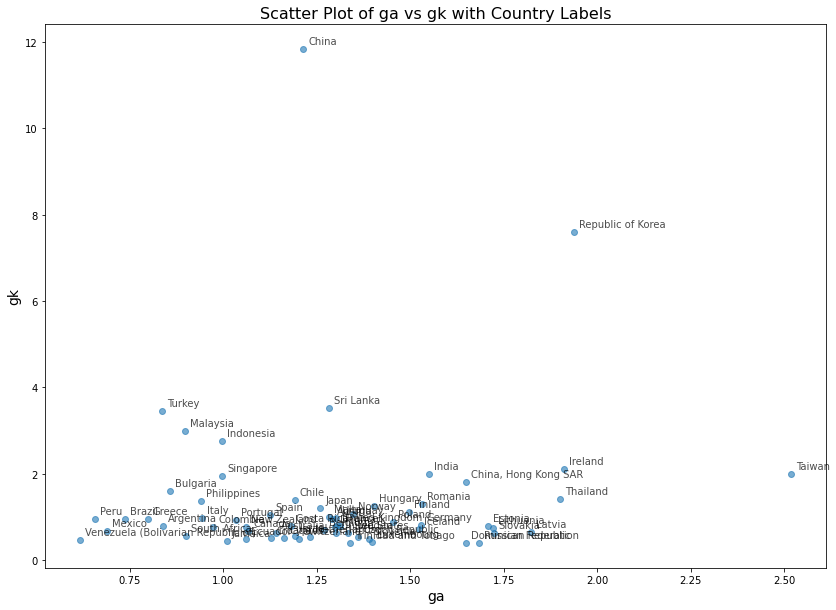

In [111]:
# ga と gk の散布図を作成
plt.figure(figsize=(14, 10))
plt.scatter(results_df['ga'], results_df['gk'], alpha=0.6)

# 各点に国名をラベルとして追加（被りを避けるため少しずらす）
for i, country in enumerate(results_df['country']):
    plt.annotate(country, 
                 (results_df['ga'][i], results_df['gk'][i]), 
                 fontsize=10, 
                 alpha=0.7, 
                 xytext=(5, 5), 
                 textcoords='offset points')

# グラフの装飾
plt.xlabel('ga', fontsize=14)
plt.ylabel('gk', fontsize=14)
plt.title('Scatter Plot of ga vs gk with Country Labels', fontsize=16)

# グラフを表示
plt.show()
